# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [95]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


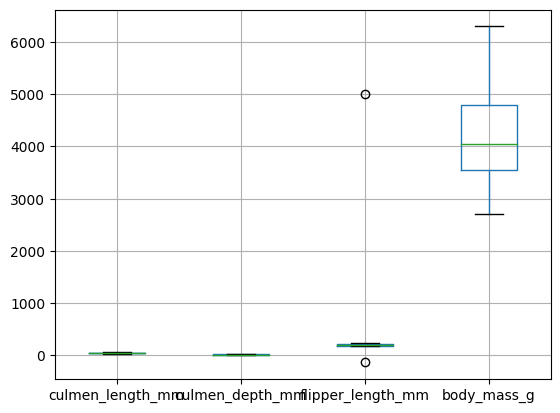

In [96]:
# Explore the data
print(penguins_df.head())
print(penguins_df.info())

# Drop null values
penguins_df = penguins_df.dropna()

# Identify outliers using boxplot
penguins_df.boxplot()
plt.show()

In [97]:
# Remove outliers (values outside the whiskers)
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])

# Create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

# Standardize the data
scaler = StandardScaler()
penguins_preprocessed = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Perform PCA without specifying the number of components
pca = PCA()
penguins_PCA = pca.fit(penguins_preprocessed)

# Determine the number of components with more than 10% explained variance ratio
n_components = sum(penguins_PCA.explained_variance_ratio_ > 0.1)

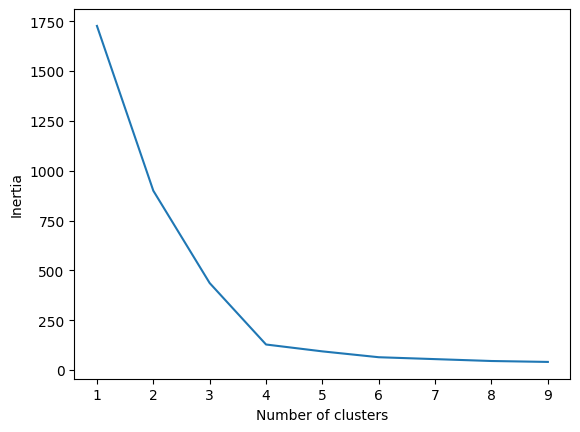

In [98]:
# Run PCA again with the optimal number of components
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Perform Elbow analysis
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)

# Visualize the inertia values
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

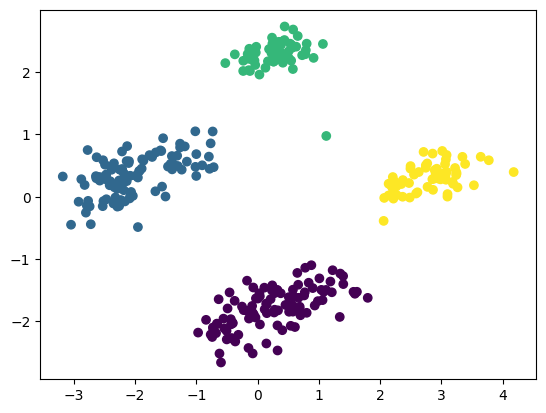

In [99]:
# Determine the optimal number of clusters (where the inertia begins to decrease more slowly)
n_clusters = 4

# Run k-means clustering algorithm with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

# Visualize the defined clusters
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_)
plt.show()

# Add a new column named 'label' to the penguins_clean dataset
penguins_clean['label'] = kmeans.labels_

# Create a list containing the names of the numeric columns
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

# Create a final characteristic DataFrame
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()

In [100]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,label
label,,,,
0,43.878302,19.111321,194.764151,0.0
1,40.217757,17.611215,189.046729,1.0
2,45.545763,14.262712,212.779661,2.0
3,49.473770,15.718033,221.540984,3.0
